In [1]:
import json
import pandas as pd
import sqlite3

In [2]:
jsonLines = open('../color-word-analysis-py/pg-results.jsonl').read().split('\n')

In [3]:
decodedLines = []
for line in jsonLines: 
    try: 
        decoded = json.loads(line)
        decodedLines.append(decoded)
    except: 
        continue

In [4]:
len(decodedLines)

1209

In [5]:
decodedLines[0]

{'2374.0': {'length': 565553,
  'totalNColors': 713,
  'colorCounts': {'sunshine': 14,
   'marble': 4,
   'gilded': 1,
   'moonlight': 8,
   'white': 103,
   'green': 43,
   'cedar': 3,
   'elm': 4,
   'chestnut': 2,
   'gray': 6,
   'crimson': 13,
   'rose': 9,
   'golden': 44,
   'silver': 10,
   'dark': 87,
   'apple': 3,
   'strawberry': 3,
   'wheat': 1,
   'leaf': 6,
   'blue': 17,
   'violet': 4,
   'red': 3,
   'berry': 1,
   'sky': 26,
   'pale': 61,
   'shadow': 13,
   'grass': 16,
   'claret': 1,
   'storm': 8,
   'earth': 16,
   'cloud': 2,
   'pink': 8,
   'smoke': 1,
   'sunbeam': 2,
   'foliage': 3,
   'purple': 4,
   'foxglove': 1,
   'sea': 25,
   'steel': 1,
   'forest': 3,
   'wine': 4,
   'bluebell': 1,
   'yellow': 6,
   'sand': 4,
   'straw': 1,
   'hay': 2,
   'tea': 2,
   'cream': 1,
   'gold': 9,
   'stone': 2,
   'ocean': 4,
   'coral': 1,
   'pearl': 3,
   'orange': 1,
   'dust': 1,
   'peace': 3,
   'black': 7,
   'velvet': 1,
   'opal': 3,
   'desert': 2,
 

In [6]:
countsDict = {}
for line in decodedLines: 
    bookId = list(line.keys())[0]
    counts = line[bookId]['colorCounts']
    countsDict[bookId] = counts

In [7]:
df = pd.DataFrame(countsDict)

In [8]:
conn = sqlite3.connect('/media/jon/Sekurkopioj/Corpora/pg-text-7.db')

In [9]:
def getMeta(bookId): 
    df = pd.read_sql('select * from meta where id=?', conn, params = [bookId])
    return df

In [10]:
df

,2374.0,2864.0,3622.0,3633.0,6036.0,6688.0,11990.0,18782.0,20528.0,26494.0,...,35079.0,23757.0,10551.0,18430.0,3477.0,45636.0,26785.0,17091.0,748.0,16376.0
sunshine,14.0,1.0,NaN,NaN,NaN,14.0,NaN,2.0,11.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,1.0
marble,4.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,2.0,4.0,NaN,1.0,6.0
gilded,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
moonlight,8.0,1.0,NaN,5.0,NaN,NaN,NaN,NaN,1.0,1.0,...,8.0,NaN,NaN,NaN,NaN,2.0,4.0,NaN,2.0,1.0
white,103.0,39.0,4.0,8.0,7.0,34.0,NaN,9.0,26.0,8.0,...,44.0,26.0,16.0,11.0,1.0,19.0,36.0,NaN,50.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
celadon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monkshood,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rufous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fiesta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
getMeta('2374.0').columns

Index(['', 'LCC', 'author', 'authoryearofbirth', 'authoryearofdeath',
       'downloads', 'formats', 'id', 'languages', 'lcsh', 'title', 'type',
       '_repo', '_version', 'alternative_title', 'contributor', 'covers',
       'creator', 'description', 'edition_identifiers', 'edition_note',
       'gutenberg_bookshelf', 'gutenberg_issued', 'gutenberg_type',
       'identifiers', 'jmdate', 'subjects', 'language_note', 'production_note',
       'publication_date', 'publication_note', 'publisher', 'rights',
       'rights_url', 'series_note', 'summary', 'tableOfContents',
       'titlepage_image', 'url', 'wikipedia', 'filename', 'releaseDate',
       'wp_publication_date', 'wp_subjects', 'wp_info', 'wp_literary_genres',
       'gr_rating', 'gr_numReviews', 'gr_pubDate', 'gr_id', 'gr_info',
       'gr_author_id', 'gr_image_url', 'gr_small_image_url', 'am_title',
       'am_author', 'am_cat', 'am_cat_ancestors', 'am_genre',
       'am_editorial_reviews', 'am_sales_rank', 'am_isbn'],
      dt

In [12]:
meta = getMeta('2374.0')

In [13]:
meta['publication_date'], meta['gr_pubDate'], meta['authoryearofbirth'], meta['wp_publication_date']

(0    
 Name: publication_date, dtype: object,
 0    1880--
 Name: gr_pubDate, dtype: object,
 0    1836
 Name: authoryearofbirth, dtype: object,
 0    
 Name: wp_publication_date, dtype: object)

In [14]:
summaryData = {}
for line in decodedLines: 
    bookId = list(line.keys())[0]
    #counts = line[bookId]['colorCounts']
    summaryData[bookId] = line[bookId]['totalNColors'] / line[bookId]['length']

In [15]:
summaryDf = pd.DataFrame(summaryData, index=['score']).T

In [16]:
def guessDate(bookId): 
    meta = getMeta(bookId)
    possibleDates = [meta[key] for key in ['gr_pubDate', 'wp_publication_date', 'publication_date']]
    processedDates = [processDate(date) for date in possibleDates]
    if processedDates == []: 
        return False
    return max(processedDates)

def processDate(year):
    try:
        year = year[0]
    except IndexError: 
        return False
    if len(year) < 4: 
        return False 
    year = int(year[:4])
    if year > 1800 and year < 2020: 
        return year
    else: 
        return False


In [17]:
summaryDf['bookId'] = summaryDf.index

In [18]:
guessDate("3622.0")

1880

In [19]:
summaryDf['date'] = summaryDf['bookId'].apply(guessDate)

In [20]:
summaryDf

,score,bookId,date
2374.0,0.001261,2374.0,1880
2864.0,0.000979,2864.0,1880
3622.0,0.000287,3622.0,1880
3633.0,0.000778,3633.0,1880
6036.0,0.001249,6036.0,1880
...,...,...,...
45636.0,0.000905,45636.0,1925
26785.0,0.002566,26785.0,1925
17091.0,0.000381,17091.0,1927
748.0,0.001557,748.0,1928


In [21]:
summaryDf.index = summaryDf['date'] 

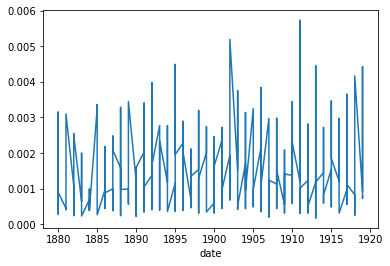

In [22]:
summaryDf[summaryDf['date'] < 1920]['score'].plot()

In [23]:
avgScores = summaryDf.groupby(summaryDf.index).mean()['score']

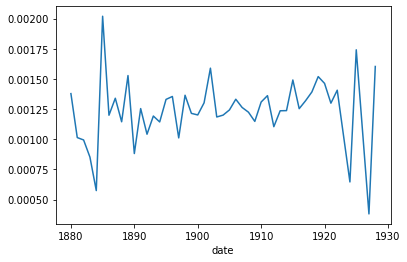

In [24]:
avgScores[avgScores.index < 1930].plot()

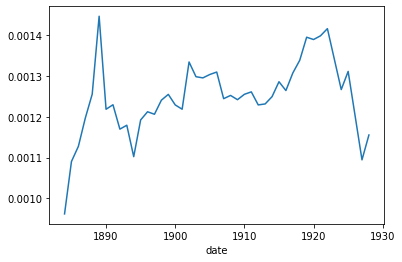

In [25]:
avgScores[avgScores.index < 1930].rolling(5).mean().plot()

In [26]:
def getDOB(bookId): 
    meta = getMeta(bookId)
    return meta['authoryearofbirth']

In [27]:
summaryDf['dob'] = summaryDf['bookId'].apply(getDOB)

In [28]:
def maybeInt(yearStr): 
    if yearStr == '': 
        return None
    else: 
        return int(yearStr)

In [29]:
summaryDf['intDOB'] = summaryDf['dob'].apply(maybeInt)

In [30]:
byDOB = summaryDf.groupby(summaryDf['intDOB']).mean()

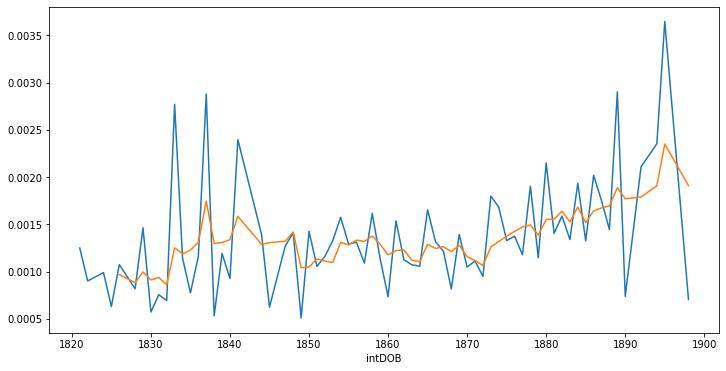

In [31]:
ax = byDOB[byDOB.index > 1820]['score'].plot(figsize=(12,6))
byDOB[byDOB.index > 1820]['score'].rolling(5).mean().plot(ax=ax, figsize=(12,6))

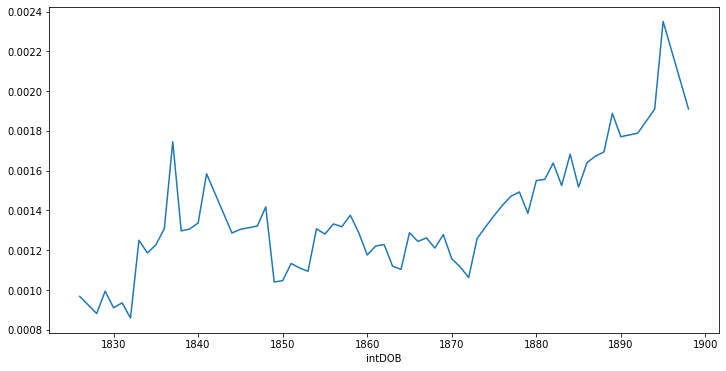

In [32]:
byDOB[byDOB.index > 1820]['score'].rolling(5).mean().plot(figsize=(12,6))